https://www.cienciadedatos.net/documentos/py24-svm-python.html

Las Máquinas de Vector Soporte se fundamentan en el *Maximal Margin Classifier*, que a su vez, se basa en el concepto de hiperplano.

------------
**Hiperplano**

En un espacio p-dimensional, un hiperplano se define como un subespacio plano y afín de dimensiones *p − 1*. El término afín significa que el subespacio no tiene por qué pasar por el origen. En un espacio de dos dimensiones, el hiperplano es un subespacio de 1 dimensión, es decir, una recta. En un espacio tridimensional, un hiperplano es un subespacio de dos dimensiones, un plano convencional

La definición matemática de un hiperplano es bastante simple. En el caso de dos dimensiones, el hiperplano se describe acorde a la ecuación de una recta:

β0 + β1x1 + β2x2 = 0

Cuando *x* no satisface la ecuación:

β0 + β1x1 + β2x2 + ... + βpxp < 0
 
o bien

β0 + β1x1 + β2x2 + ... + βpxp > 0
 
el punto *x* cae a un lado o al otro del hiperplano. Así pues, se puede entender que un hiperplano divide un espacio p-dimensional en dos mitades. Para saber en qué lado del hiperplano se encuentra un determinado punto *x*, solo hay que calcular el signo de la ecuación.

-----------
**Clasificación binaria empleando un Hiperplano**

Cuando se dispone de *n* observaciones, cada una con *p* predictores y cuya variable respuesta tiene dos niveles (de aquí en adelante identificados como *+1* y *−1*), se pueden emplear hiperplanos para construir un clasificador que permita predecir a qué grupo pertenece una observación en función de sus predictores.

**CASOS PERFECTAMENTE SEPARABLES LINEALMENTE**

Si la distribución de las observaciones es tal que se pueden separar linealmente de forma perfecta en las dos clases (*+1* y *−1*), entonces, un hiperplano de separación cumple que:

β0 + β1x1 + β2x2 + ... + βpxp > 0, si yi = 1
 
β0 + β1x1 + β2x2 + ... + βpxp < 0, si yi = -1

La definición de hiperplano para casos perfectamente separables linealmente resulta en un número infinito de posibles hiperplanos, lo que hace necesario un método que permita seleccionar uno de ellos como clasificador óptimo.

<img src="imagenes\09_Maquinas de Vector Soporte (SVM)\01_hiperplanos_infinitos.PNG" width="300">

La solución a este problema consiste en seleccionar como clasificador óptimo el hiperplano que se encuentra más alejado de todas las observaciones de entrenamiento. A este se le conoce como como *maximal margin hyperplane* o *hiperplano óptimo de separación*. Aunque esta idea suena razonable, no es posible aplicarla, ya que habría infinitos hiperplanos contra los que medir las distancias. En su lugar, se recurre a métodos de optimización dual.

<img src="imagenes\09_Maquinas de Vector Soporte (SVM)\02_maximal_margin_hyperplane.PNG" width="300">

La imagen anterior muestra el *maximal margin hyperplane*, formado por el hiperplano (línea negra continua y su margen (las dos líneas discontinuas). Las tres observaciones equidistantes respecto al *maximal margin hyperplane* que se encuentran a lo largo de las líneas discontinuas se les conoce como vectores soporte, ya que son vectores en un espacio p-dimensional y soportan (definen) el *maximal margin hyperplane*. Cualquier modificación en estas observaciones (vectores soporte) conlleva cambios en el *maximal margin hyperplane*. Sin embargo, modificaciones en observaciones que no son vector soporte no tienen impacto alguno en el hiperplano.

**CASOS CUASI-SEPARABLES LINEALMENTE**

En la gran mayoría de casos reales, los datos no se pueden separar linealmente de forma perfecta, por lo que no existe un hiperplano de separación y no puede obtenerse un *maximal margin hyperplane.*

<img src="imagenes\09_Maquinas de Vector Soporte (SVM)\03_clases_no_separables_linealmente.PNG" width="300">

Para solucionar estas situaciones, se puede extender el concepto de *maximal margin hyperplane* para obtener un hiperplano que "casi" separe las clases, pero permitiendo que se cometan unos pocos errores. A este tipo de hiperplano se le conoce como **Support Vector Classifier o Soft Margin**.

-----------
**Support Vector Classifier o Soft Margin SVM**

Es preferible crear un clasificador basado en un hiperplano que, aunque no separe perfectamente las dos clases, sea más robusto y tenga mayor capacidad predictiva al aplicarlo a nuevas observaciones (menos problemas de *overfitting*). Esto es exactamente lo que consiguen los clasificadores de vector soporte, también conocidos como *soft margin classifiers* o *Support Vector Classifiers*. Para lograrlo, en lugar de buscar el margen de clasificación más ancho posible que consigue que las observaciones estén en el lado correcto del margen; se permite que ciertas observaciones estén en el lado incorrecto del margen o incluso del hiperplano.

<img src="imagenes\09_Maquinas de Vector Soporte (SVM)\04_clasificador_vector_soporte.PNG" width="300">

La identificación del hiperplano que clasifique correctamente la mayoría de las observaciones a excepción de unas pocas, es un problema de optimización convexa. Si bien la demostración matemática queda fuera del objetivo de esta introducción, es importante mencionar que el proceso incluye un hiperparámetro llamado *C*. *C* controla el número y severidad de las violaciones del margen (y del hiperplano) que se toleran en el proceso de ajuste. Si *C = ∞* , no se permite ninguna violación del margen y por lo tanto, el resultado es equivalente al *Maximal Margin Classifier* (teniendo en cuenta que esta solución solo es posible si las clases son perfectamente separables). Cuando más se aproxima *C* a cero, menos se penalizan los errores y más observaciones pueden estar en el lado incorrecto del margen o incluso del hiperplano. *C* es a fin de cuentas el hiperparámetro encargado de controlar el balance entre bias y varianza del modelo. En la práctica, su valor óptimo se identifica mediante validación cruzada.

El proceso de optimización tiene la peculiaridad de que solo las observaciones que se encuentran justo en el margen o que lo violan influyen sobre el hiperplano. A estas observaciones se les conoce como vectores soporte y son las que definen el clasificador obtenido. Esta es la razón por la que el parámetro *C* controla el balance entre bias y varianza. Cuando el valor de *C* es pequeño, el margen es más ancho, y más observaciones violan el margen, convirtiéndose en vectores soporte. El hiperplano está, por lo tanto, sustentado por más observaciones, lo que aumenta el bias pero reduce la varianza. Cuando mayor es el valor de *C*, menor el margen, menos observaciones son vectores soporte y el clasificador resultante tiene menor bias pero mayor varianza.

Otra propiedad importante que deriva de que el hiperplano dependa únicamente de una pequeña proporción de observaciones (vectores soporte), es su robustez frente a observaciones muy alejadas del hiperplano.

-----------
**Máquinas de Vector Soporte**

El *Support Vector Classifier* descrito en los apartados anteriores consigue buenos resultados cuando el límite de separación entre clases es aproximadamente lineal. Si no lo es, su capacidad decae drásticamente. Una estrategia para enfrentarse a escenarios en los que la separación de los grupos es de tipo no lineal consiste en expandir las dimensiones del espacio original.

El hecho de que los grupos no sean linealmente separables en el espacio original no significa que no lo sean en un espacio de mayores dimensiones. Las imágenes siguientes muestran dos grupos cuya separación en dos dimensiones no es lineal, pero sí lo es al añadir una tercera dimensión.

<img src="imagenes\09_Maquinas de Vector Soporte (SVM)\05_support_vector_machine.PNG" width="300">

El método de *Máquinas Vector Soporte (SVM)* se puede considerar como una extensión del *Support Vector Classifier* obtenida al aumentar la dimensión de los datos. Los límites de separación lineales generados en el espacio aumentado se convierten en límites de separación no lineales al proyectarlos en el espacio original.

-----------
**Aumento de la dimensión: kernels**

Un *kernel (K)* es una función que devuelve el resultado del producto escalar entre dos vectores realizado en un nuevo espacio dimensional distinto al espacio original en el que se encuentran los vectores.

**Kernel lineal**

K(x,x') = x⋅x'
 
Si se emplea un Kernel lineal, el clasificador *Support Vector Machine* obtenido es equivalente al *Support Vector Classifier*.

**Kernel polinómico**

K(x,x') = (x⋅x'+c)^d
 
Cuando se emplea *d = 1* y *c = 0*, el resultado es el mismo que el de un kernel lineal. Si *d > 1*, se generan límites de decisión no lineales, aumentando la no linealidad a medida que aumenta *d*. No suele ser recomendable emplear valores de *d* mayores 5 por problemas de overfitting.

**Gaussian Kernel (RBF)**

K(x,x') = exp(−γ||x−x'||^2)
 
El valor de *γ* controla el comportamiento del *kernel*, cuando es muy pequeño, el modelo final es equivalente al obtenido con un *kernel* lineal, a medida que aumenta su valor, también lo hace la flexibilidad del modelo.

Los kernels descritos son solo unos pocos de los muchos que existen. Cada uno tiene una serie de hiperparámetros cuyo valor óptimo puede encontrarse mediante validación cruzada. No puede decirse que haya un *kernel* que supere al resto, depende en gran medida de la naturaleza del problema que se esté tratando. Ahora bien, tal como indican los autores de *A Practical Guide to Support Vector Classification*, es muy recomendable probar el *kernel RBF*. Este *kernel* tiene dos ventajas: que solo tiene dos hiperparámetros que optimizar (*γ* y la penalización *C* común a todos los SVM) y que su flexibilidad puede ir desde un clasificador lineal a uno muy complejo.

# Librerias

In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

# Preprocesado y modelado
# ==============================================================================
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Datos

In [2]:
# Datos
# ==============================================================================
url = 'https://raw.githubusercontent.com/JoaquinAmatRodrigo/' \
       + 'Estadistica-machine-learning-python/master/data/ESL.mixture.csv'
datos = pd.read_csv(url)
datos.head(3)

,X1,X2,y
0,2.526093,0.321050,0
1,0.366954,0.031462,0
2,0.768219,0.717486,0


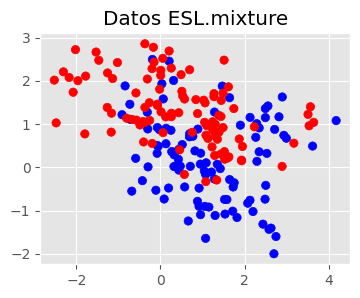

In [3]:
fig, ax = plt.subplots(figsize=(4,3))
ax.scatter(datos.X1, datos.X2, c=datos.y);
ax.set_title("Datos ESL.mixture")
plt.show();

# SVM lineal

En *Scikit Learn* pueden encontrarse tres implementaciones distintas del algoritmo *Suport Vector Machine*:

- Las clases `sklearn.svm.SVC` y `sklearn.svm.NuSVC` permiten crear modelos SVM de clasificación empleando kernel lineal, polinomial, radial o sigmoide. La diferencia es que `SVC` controla la regularización a través del hiperparámetro `C`, mientras que `NuSVC` lo hace con el número máximo de vectores soporte permitidos.

- La clase `sklearn.svm.LinearSVC` permite ajustar modelos SVM con kernel lineal. Es similar a `SVC` cuando el parámetro `kernel = 'linear'`, pero utiliza un algoritmo más rápido.

Las mismas implementaciones están disponibles para regresión en las clases: `sklearn.svm.SVR`, `sklearn.svm.NuSVR` y `sklearn.svm.LinearSVR`.

In [4]:
# División de los datos en train y test
# ==============================================================================
X = datos.drop(columns = 'y')
y = datos['y']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

*C* controla el número y severidad de las violaciones del margen (y del hiperplano) que se toleran en el proceso de ajuste. Si *C = ∞*, no se permite ninguna violación del margen y por lo tanto, el resultado es equivalente al Maximal Margin Classifier (teniendo en cuenta que esta solución solo es posible si las clases son perfectamente separables). Cuando más se aproxima *C* a cero, menos se penalizan los errores y más observaciones pueden estar en el lado incorrecto del margen o incluso del hiperplano. *C* es a fin de cuentas el hiperparámetro encargado de controlar el balance entre bias y varianza del modelo. En la práctica, su valor óptimo se identifica mediante validación cruzada.

A mayor valor de *C*, el margen es más alto, más vectores soporte. Mayor bias y menor varianza.

A menor valor de *C*, el margen es más pequeño, menos vectores soporte. Menor bias y más varianza.

In [5]:
# Creación del modelo SVM lineal
# ==============================================================================
modelo = SVC(C = 100, kernel = 'linear', random_state=123)
modelo.fit(X_train, y_train)

SVC(C=100, kernel='linear', random_state=123)

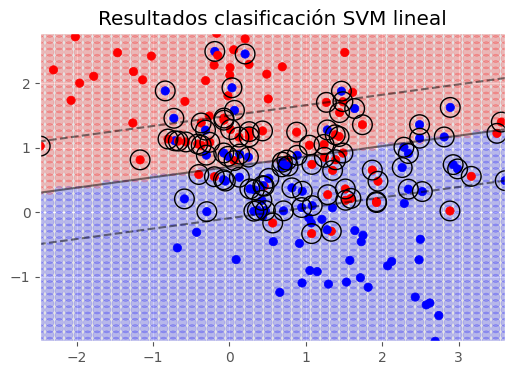

In [30]:
# Representación gráfica de los límites de clasificación
# ==============================================================================
# Grid de valores
x = np.linspace(np.min(X_train.X1), np.max(X_train.X1), 50)
y = np.linspace(np.min(X_train.X2), np.max(X_train.X2), 50)
Y, X = np.meshgrid(y, x)
grid = np.vstack([X.ravel(), Y.ravel()]).T

# Predicción valores grid
pred_grid = modelo.predict(grid)

fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(grid[:,0], grid[:,1], c=pred_grid, alpha = 0.2)
ax.scatter(X_train.X1, X_train.X2, c=y_train, alpha = 1)

# Vectores soporte
ax.scatter(
    modelo.support_vectors_[:, 0],
    modelo.support_vectors_[:, 1],
    s=200, linewidth=1,
    facecolors='none', edgecolors='black'
)

# Hiperplano de separación
ax.contour(
    X,
    Y,
    modelo.decision_function(grid).reshape(X.shape),
    colors = 'k',
    levels = [-1, 0, 1],
    alpha  = 0.5,
    linestyles = ['--', '-', '--']
)

ax.set_title("Resultados clasificación SVM lineal")
plt.show();

In [31]:
# Predicciones test
# ==============================================================================
predicciones = modelo.predict(X_test)
predicciones

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0], dtype=int64)

In [32]:
# Accuracy de test del modelo 
# ==============================================================================
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")


El accuracy de test es: 70.0%


# SVM radial

Se repite el ajuste del modelo, esta vez empleando un kernel radial y utilizando validación cruzada para identificar el valor óptimo de penalización *C*.

In [33]:
# Grid de hiperparámetros
# ==============================================================================
param_grid = {'C': np.logspace(-5, 7, 20)}

# Búsqueda por validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = SVC(kernel= "rbf", gamma='scale'),
        param_grid = param_grid,
        scoring    = 'accuracy',
        n_jobs     = -1,
        cv         = 3, 
        verbose    = 0,
        return_train_score = True
      )

# Se asigna el resultado a _ para que no se imprima por pantalla
_ = grid.fit(X = X_train, y = y_train)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) \
    .head(5)

,param_C,mean_test_score,std_test_score,mean_train_score,std_train_score
8,1.128838,0.762520,0.023223,0.790778,0.035372
12,379.269019,0.750641,0.076068,0.868777,0.007168
7,0.263665,0.750175,0.030408,0.778228,0.026049
9,4.83293,0.744118,0.044428,0.815729,0.026199
11,88.586679,0.738062,0.064044,0.859431,0.019840


In [34]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

modelo = grid.best_estimator_

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'C': 1.1288378916846884} : 0.7625203820172374 accuracy


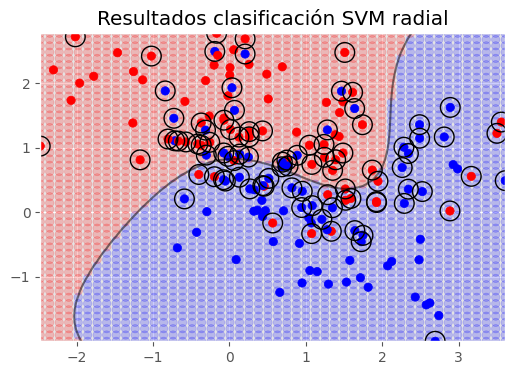

In [37]:
# Representación gráfica de los límites de clasificación
# ==============================================================================
# Grid de valores
x = np.linspace(np.min(X_train.X1), np.max(X_train.X1), 50)
y = np.linspace(np.min(X_train.X2), np.max(X_train.X2), 50)
Y, X = np.meshgrid(y, x)
grid = np.vstack([X.ravel(), Y.ravel()]).T

# Predicción valores grid
pred_grid = modelo.predict(grid)

fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(grid[:,0], grid[:,1], c=pred_grid, alpha = 0.2)
ax.scatter(X_train.X1, X_train.X2, c=y_train, alpha = 1)

# Vectores soporte
ax.scatter(
    modelo.support_vectors_[:, 0],
    modelo.support_vectors_[:, 1],
    s=200, linewidth=1,
    facecolors='none', edgecolors='black'
)

# Hiperplano de separación
ax.contour(
    X,
    Y,
    modelo.decision_function(grid).reshape(X.shape),
    colors='k',
    levels=[0],
    alpha=0.5,
    linestyles='-'
)

ax.set_title("Resultados clasificación SVM radial")
plt.show();

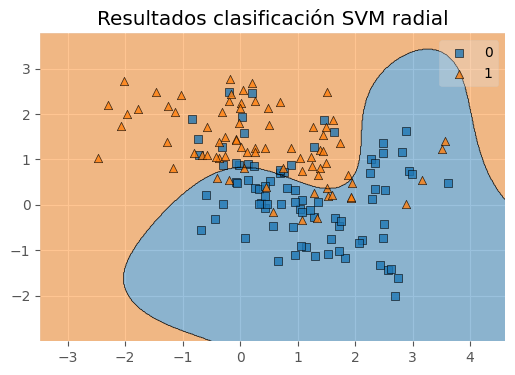

In [38]:
# Representación gráfica utilizando plot_decision_regions() de mlxtend
# ==============================================================================
fig, ax = plt.subplots(figsize=(6,4))
plot_decision_regions(
    X = X_train.to_numpy(),
    y = y_train.flatten(),
    clf = modelo,
    ax = ax
)
ax.set_title("Resultados clasificación SVM radial")
plt.show();

In [39]:
# Predicciones test
# ==============================================================================
predicciones = modelo.predict(X_test)

In [40]:
# Accuracy de test del modelo 
# ==============================================================================
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")


El accuracy de test es: 80.0%


In [41]:
# Matriz de confusión de las predicciones de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    predicciones,
    rownames=['Real'],
    colnames=['Predicción']
)
confusion_matrix

Predicción,0,1
Real,,
0,14,3
1,5,18


Con un modelo SVM de kernel radial se consigue clasificar correctamente el 80% de las observaciones de test. Se podría intentar mejorar aún más el modelo optimizando el valor del hiperparámetro `gamma` o utilizando otro tipo de kernel.